In [1]:
import numpy as np
from scipy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import math
import time

In [2]:
k = 52 #W/m°C - Aço 1020
ri = 0.01 #m
re = 0.1 #m
Ti = 250 #°C
Te = 25 #°C
H = 1 #m - Largura
omega = 1e10 #rad/s
rho = 7800 #kg/m³
cp = 486 #j/kgK
theta = np.pi/4 #rad


In [3]:
meshx = 50
deltax = ((re-ri)*math.cos(theta))/(meshx-1)

meshy = 50
deltay = ((re-ri)*math.sin(theta))/(meshy-1)

#Pe = rho*u*deltax/(k/cp)
#deltax_max = 2 *(k/cp)/(rho*u)

In [4]:
def raio(x,y):
    r = (x**2 + y**2)**0.5
    return r

In [5]:
def vel_u(x,y):
    r = raio(x,y)
    V = omega*r
    alpha = math.atan(y/x)
    u = V*math.sin(alpha)
    return u

In [6]:
def vel_v(x,y):
    r = raio(x,y)
    V = omega*r
    alpha = math.atan(y/x)
    v = V*math.cos(alpha)
    return v

In [7]:
def T_exata(x,y):
    r = raio(x,y)
    T = (Te-Ti)*math.log(r/ri)/(math.log(re/ri)) + Ti
    
    return T

In [8]:
x_plot = np.zeros(meshx)
y_plot = np.zeros(meshy)

x_plot[0] = ri*math.cos(theta) #posição inicial x
for x in range(1,meshx):
    x_plot[x] = x_plot[x-1] + deltax
    
y_plot[0] = ri*math.sin(theta) #posição inicial y
for y in range(1,meshy):
    y_plot[y] = y_plot[y-1] + deltay

In [9]:
re*math.cos(theta)

0.07071067811865477

In [10]:
x_plot

array([ 0.00707107,  0.00836984,  0.0096686 ,  0.01096737,  0.01226614,
        0.01356491,  0.01486367,  0.01616244,  0.01746121,  0.01875998,
        0.02005874,  0.02135751,  0.02265628,  0.02395505,  0.02525381,
        0.02655258,  0.02785135,  0.02915012,  0.03044888,  0.03174765,
        0.03304642,  0.03434519,  0.03564395,  0.03694272,  0.03824149,
        0.03954026,  0.04083902,  0.04213779,  0.04343656,  0.04473533,
        0.04603409,  0.04733286,  0.04863163,  0.0499304 ,  0.05122916,
        0.05252793,  0.0538267 ,  0.05512547,  0.05642423,  0.057723  ,
        0.05902177,  0.06032054,  0.06161931,  0.06291807,  0.06421684,
        0.06551561,  0.06681438,  0.06811314,  0.06941191,  0.07071068])

In [11]:
#Solução analítica

num_pontos = meshx*meshy

x_analitico = np.linspace(ri,re,num_pontos)
T_analitico = np.zeros(num_pontos)
T_analitico_2D = np.zeros((meshx,meshy))
'''
i = 0
for r in x_analitico:
    T_analitico[i] = (Te-Ti)*math.log(r/ri)/(math.log(re/ri)) + Ti
    i += 1
'''
    
#Construindo uma matriz 2D de Temperaturas exatas 
#para avaliar o erro
for x in range(meshx):
    for y in range(meshy):
        T_analitico_2D[x,y] = T_exata(x_plot[x],y_plot[y])


In [12]:
#Solução numérica

ap = np.zeros((meshx,meshy))
ae = np.zeros((meshx,meshy))
aw = np.zeros((meshx,meshy))
an = np.zeros((meshx,meshy))
aS = np.zeros((meshx,meshy))
b = np.zeros((meshx,meshy))
Matrix_coef_a = np.zeros((meshx*meshy,meshx*meshy))
Matrix_coef_b = np.zeros((meshx*meshy,1))

#Determinação das temperaturas prescritas
for x in range(meshx):
    for y in range(meshy):
        if (x==0) or (y==0) or (x==meshx-1) or (y==meshy-1):
            ap[x,y] = 1
            b[x,y] = T_exata(x_plot[x],y_plot[y])
            #b[x,y] = raio(x_plot[x],y_plot[y])
            
#Determinação dos campos de velocidades
ue = np.zeros((meshx,meshy))
uw = np.zeros((meshx,meshy))
vn = np.zeros((meshx,meshy))
vs = np.zeros((meshx,meshy))

for x in range(1,meshx-1):
    for y in range(1,meshy-1):
        uw[x,y] = -vel_u(x_plot[x]-deltax/2, y_plot[y])
        ue[x,y] = -vel_u(x_plot[x]+deltax/2, y_plot[y])
        vn[x,y] = vel_v(x_plot[x], y_plot[y]+deltay/2)
        vs[x,y] = vel_v(x_plot[x], y_plot[y]-deltay/2)
        
Me = ue*rho*H*deltay
Mw = uw*rho*H*deltay
Mn = vn*rho*H*deltax
Ms = vs*rho*H*deltax



In [13]:
ue

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [14]:
uw

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,  -8.36983537e+09,  -9.66860293e+09, ...,
         -6.81131430e+10,  -6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [15]:
vn

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   8.36983537e+09,   8.36983537e+09, ...,
          8.36983537e+09,   8.36983537e+09,   0.00000000e+00],
       [  0.00000000e+00,   9.66860293e+09,   9.66860293e+09, ...,
          9.66860293e+09,   9.66860293e+09,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   6.81131430e+10,   6.81131430e+10, ...,
          6.81131430e+10,   6.81131430e+10,   0.00000000e+00],
       [  0.00000000e+00,   6.94119106e+10,   6.94119106e+10, ...,
          6.94119106e+10,   6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [16]:
vs

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   8.36983537e+09,   8.36983537e+09, ...,
          8.36983537e+09,   8.36983537e+09,   0.00000000e+00],
       [  0.00000000e+00,   9.66860293e+09,   9.66860293e+09, ...,
          9.66860293e+09,   9.66860293e+09,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   6.81131430e+10,   6.81131430e+10, ...,
          6.81131430e+10,   6.81131430e+10,   0.00000000e+00],
       [  0.00000000e+00,   6.94119106e+10,   6.94119106e+10, ...,
          6.94119106e+10,   6.94119106e+10,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [17]:
x_plot = np.zeros(meshx)
y_plot = np.zeros(meshy)

x_plot[0] = ri*math.cos(theta) #posição inicial x
for x in range(1,meshx):
    x_plot[x] = x_plot[x-1] + deltax
    
y_plot[0] = ri*math.sin(theta) #posição inicial y
for y in range(1,meshy):
    y_plot[y] = y_plot[y-1] + deltay

In [18]:
Mw

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -8.47896710e+10,  -9.79466889e+10, ...,
         -6.90012495e+11,  -7.03169513e+11,   0.00000000e+00],
       [  0.00000000e+00,  -8.47896710e+10,  -9.79466889e+10, ...,
         -6.90012495e+11,  -7.03169513e+11,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -8.47896710e+10,  -9.79466889e+10, ...,
         -6.90012495e+11,  -7.03169513e+11,   0.00000000e+00],
       [  0.00000000e+00,  -8.47896710e+10,  -9.79466889e+10, ...,
         -6.90012495e+11,  -7.03169513e+11,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [19]:
#CDS
#atribuindo valor aos coeficientes dos volumes internos
for y in range(1,meshy-1):
    for x in range(1,meshx-1):    
        ae[y,x] = k*H*deltay/(cp*deltax) - Me[y,x]/2
        aw[y,x] = k*H*deltay/(cp*deltax) + Mw[y,x]/2
        an[y,x] = k*H*deltax/(cp*deltay) - Mn[y,x]/2
        aS[y,x]= k*H*deltax/(cp*deltay) + Ms[y,x]/2
        ap[y,x] = ae[y,x] + aw[y,x] + an[y,x] + aS[y,x]
        
#montando a matriz dos coeficientes
cont = 0
for x in range(meshx):
    for y in range(meshy):
        Matrix_coef_a[cont,cont] = ap[y,x]
        Matrix_coef_a[cont,cont-1] = -aw[y,x]
        
        if cont < meshx*meshy-1:
            Matrix_coef_a[cont,cont+1] = -ae[y,x]
        if cont < meshx*meshy-meshy:   
            Matrix_coef_a[cont,cont+meshy] = -an[y,x]
        if cont >meshy-1:
            Matrix_coef_a[cont,cont-meshy] = -aS[y,x]
        
        
        Matrix_coef_b[cont,0] = b[y,x]
        cont += 1
        
    
TCDS = solve(Matrix_coef_a,Matrix_coef_b)

#transformando o vetor Temperatura em Matriz
TCDS_2D = np.zeros((meshx,meshy))
cont = 0
for y in range(meshy):
    for x in range(meshx):
        TCDS_2D[y,x] = TCDS[cont]
        cont += 1

erro = np.zeros((meshx,meshy))        
erro = abs(TCDS_2D-T_analitico_2D)

erromaxCDS = erro.max()

In [20]:
#UDS
#atribuindo valor aos coeficientes dos volumes internos
for y in range(1,meshy-1):
    for x in range(1,meshx-1):
        ae[y,x] = k*H*deltay/(cp*deltax) - Me[y,x]
        aw[y,x] = k*H*deltay/(cp*deltax)
        an[y,x] = k*H*deltax/(cp*deltay)
        aS[y,x] = k*H*deltax/(cp*deltay) + Ms[y,x]
        ap[y,x] = ae[y,x] + aw[y,x] + an[y,x] + aS[y,x]
        
#montando a matriz dos coeficientes
cont = 0
for x in range(meshx):
    for y in range(meshy):
        Matrix_coef_a[cont,cont] = ap[y,x]
        Matrix_coef_a[cont,cont-1] = -aw[y,x]
        
        if cont < meshx*meshy-1:
            Matrix_coef_a[cont,cont+1] = -ae[y,x]
        if cont < meshx*meshy-meshy:   
            Matrix_coef_a[cont,cont+meshy] = -an[y,x]
        if cont >meshy-1:
            Matrix_coef_a[cont,cont-meshy] = -aS[y,x]
        
        
        Matrix_coef_b[cont,0] = b[y,x]
        cont += 1
        
    
TUDS = solve(Matrix_coef_a,Matrix_coef_b)

#transformando o vetor Temperatura em Matriz
TUDS_2D = np.zeros((meshx,meshy))
cont = 0
for y in range(meshy):
    for x in range(meshx):
        TUDS_2D[y,x] = TUDS[cont]
        cont += 1

erro = np.zeros((meshx,meshy))        
erro = abs(TUDS_2D-T_analitico_2D)

erromaxUDS = erro.max()

In [21]:
#Exponencial

#atribuindo valor aos coeficientes difusivos

De = k*H*deltay/(cp*deltax) 
Dw = k*H*deltay/(cp*deltax)
Dn = k*H*deltax/(cp*deltay)
Ds = k*H*deltax/(cp*deltay) 
        
Pe = abs(Me/De)
Pw = abs(Mw/Dw)
Pn = abs(Mn/Dn)
Ps = abs(Ms/Ds)

ae = De*Pe/(np.e**Pe-1)-Me
aw = Dw*Pw/(np.e**Pw-1)
an = Dn*Pn/(np.e**Pn-1)
aS = Ds*Ps/(np.e**Ps-1)+Ms
ap = ae + aw + an + aS

#retirando os valores de NaN
for y in range(meshy):
    for x in range(meshx):
        if (x==0) or (y==0) or (x==meshx-1) or (y==meshy-1):
            ae[x,y] = 0
            aw[x,y] = 0
            an[x,y] = 0
            aS[x,y] = 0
            ap[x,y] = 1
            
#montando a matriz dos coeficientes
cont = 0
for x in range(meshx):
    for y in range(meshy):
        Matrix_coef_a[cont,cont] = ap[y,x]
        Matrix_coef_a[cont,cont-1] = -aw[y,x]
        
        if cont < meshx*meshy-1:
            Matrix_coef_a[cont,cont+1] = -ae[y,x]
        if cont < meshx*meshy-meshy:   
            Matrix_coef_a[cont,cont+meshy] = -an[y,x]
        if cont >meshy-1:
            Matrix_coef_a[cont,cont-meshy] = -aS[y,x]
        
        
        Matrix_coef_b[cont,0] = b[y,x]
        cont += 1
        
    
Texp = solve(Matrix_coef_a,Matrix_coef_b)

#transformando o vetor Temperatura em Matriz
Texp_2D = np.zeros((meshx,meshy))
cont = 0
for x in range(meshx):
    for y in range(meshy):
        Texp_2D[x,y] = Texp[cont]
        cont += 1
        
erro = np.zeros((meshx,meshy))        
erro = abs(Texp_2D-T_analitico_2D)

erromaxexp = erro.max()


C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: overflow encountered in power
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in power
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: overflow encountered in power
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: overflow encountered in power
C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


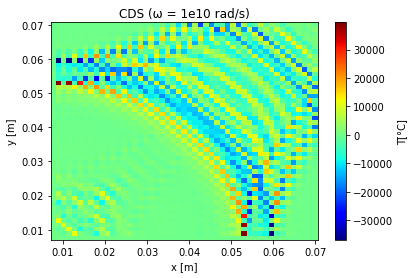

In [26]:
#Grafico 2D
%matplotlib inline
        
X,Y = np.meshgrid(x_plot,y_plot)

fig, ax = plt.subplots()

#ax.contourf(X,Y,abs(TCDS_2D-T_analitico_2D),cmap='jet')
#ax.contourf(X,Y,TCDS_2D,50,cmap='jet')
p = ax.pcolor(X, Y, TCDS_2D, cmap='jet')
cb = fig.colorbar(p, ax=ax)

cb.set_label('T[°C]')

ax.set_ylabel('y [m]')
ax.set_xlabel('x [m]')
ax.set_title(u'CDS (\u03C9 = 1e10 rad/s)')



In [23]:
erromaxCDS

39463.580293153849

In [24]:
erromaxUDS

0.51816519399176286

In [25]:
erromaxexp

0.52124619986821585